## What is the true normal human body temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. In 1992, this value was revised to 36.8$^{\circ}$C or 98.2$^{\circ}$F. 

#### Exercise
In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.

Answer the following questions **in this notebook below and submit to your Github account**. 

1.  Is the distribution of body temperatures normal? 
    - Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 
2.  Is the true population mean really 98.6 degrees F?
    - Bring out the one sample hypothesis test! In this situation, is it approriate to apply a z-test or a t-test? How will the result be different?
3.  At what temperature should we consider someone's temperature to be "abnormal"?
    - Start by computing the margin of error and confidence interval.
4.  Is there a significant difference between males and females in normal temperature?
    - Set up and solve for a two sample hypothesis testing.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
 %matplotlib inline
import pandas as pd 
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [2]:
df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
len(df)#.head()

130

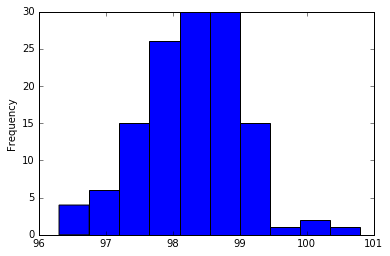

In [4]:
df.temperature.plot(kind='hist')

In [5]:
df.temperature.mean()

98.24923076923078

In [6]:
dfMale=df[df.gender =='M']
dfMale.head()
dfMale.temperature.mean()

98.1046153846154

In [7]:
len (dfMale)

65

In [8]:
dfFemale=df[df.gender =='F']
dfFemale.head()
dfFemale.temperature.mean()

98.39384615384613

In [9]:
df.temperature.std()

0.7331831580389454

In [10]:
len (dfFemale)

65

###  1.Is the distribution of body temperatures normal
####  Calculate the p value for 3 sd values in both direction


In [11]:
# 3sd value
threeSdValue = (3*df.temperature.std())+ df.temperature.mean()
print (threeSdValue)


100.44878024334761


In [12]:
zOfthreeSdValue= (100.44878024334761-df.temperature.mean())/df.temperature.std()
print (zOfthreeSdValue)

2.9999999999999996


#### p-value=0.0028  #or .28%  which is less then 5%

### 2.Is the true population mean really 98.6 degrees F?

#### Null hypothesis is population mean is = 98.6. If  will reject  hypothesis is true when  getting sample mean of 98.25 is less then 1%.
#### Since the sample size is big and have normal distribution , we will use z-test

In [13]:
zvalue= (df.temperature.mean()-98.26)/ (130/np.sqrt(len(df)))
print (zvalue)
# p value is 0.989628  or 98.9 % . Getting sample mean at 98.25 is 98.9% proabable for population with mean of 98.6.

-0.000944524020792


## 3. At what temperature should we consider someone's temperature to be "abnormal"?

In [15]:
# Sample Mean =df.temperature.mean() 
# Sample SD = df.temperature.std()
# Sample size =130
# Z-coefficient for 95% = 1.96
marginOfError = 1.96 * (df.temperature.std()/np.sqrt(len(df)))
print (marginOfError)

confidenceIntervalPlus= df.temperature.mean()+ marginOfError
print (confidenceIntervalPlus)

confidenceIntervalMinus= df.temperature.mean()- marginOfError
print (confidenceIntervalMinus)

# the temprature less then 98.1231941122 and more then 98.3752674262 is abnormal

0.126036657002
98.3752674262
98.1231941122


### 4. Is there a significant difference between males and females in normal temperature?

In [29]:
# Null hypothesis is no difference in male and female temprature
# from Z-table chart , the differene of sample mean should have less then 5% chance . The critcal value from z-chart is 
# 1.67 on both side.
combinedSD= np.sqrt( np.square(dfMale.temperature.std())/65  + np.square(dfFemale.temperature.std())/65)
print (combinedSD * 1.67  )
# limit values are 0.211345097201 and -0.211345097201
# id differnce in sample means is within this range , there is 95% chance of having difference in samples. 
meanDiff= df.temperature.mean()-dfFemale.temperature.mean()
print (meanDiff)

# meanDiff -0.14461538461534929 is greater then -0.211345097201 , within the range. Meaning 95% chance that 
# when two samples are taken difference in their mean is can be 0.14461538461534929. The difference in sample
# means are not significantly high to reject the null hypothesis .


0.211345097201
-0.14461538461534929
